In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("restaurant-comments.xlsx")

In [5]:
df.head()

,comments,date
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


In [6]:
from dateutil import parser

In [7]:
df["date"] = df.date.apply(parser.parse)

TypeError: Parser must be a string or character stream, not Timestamp

In [9]:
text = df.comments.iloc[0]

In [10]:
from snownlp import SnowNLP
s = SnowNLP(text)

In [11]:
s.sentiments

0.4244401030222834

In [12]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [13]:
df["sentiment"] = df.comments.apply(get_sentiment_cn)

In [14]:
df.head()

,comments,date,sentiment
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,0.424440
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,0.450691
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,0.118200
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,0.871226


In [15]:
df.sentiment.mean()

0.6987503312852683

In [16]:
df.sentiment.median()

0.9270364310550024

In [17]:
import time%pylab inline
from ggplot import *

Populating the interactive namespace from numpy and matplotlib


E:\py3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
E:\py3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
E:\py3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
E:\py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


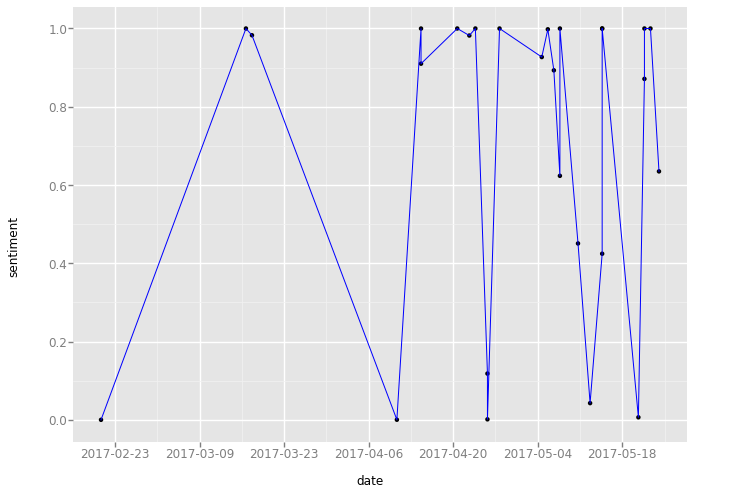

<ggplot: (-9223372036812759001)>

In [18]:
ggplot(aes(x="date", y="sentiment"), data=df) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format("%Y-%m-%d"))

In [19]:
df.sort_values(['sentiment'])[:1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08


In [20]:
print(df.sort_values(['sentiment']).iloc[0].comments)

这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人都多，所以特意错开，这次实在是馋A餐厅了，所以赶在正日子也出来了，从下午四点多的时候我看排号就排到一百多了，我从家开车过去得堵的话一个小时，我一看提前两个小时就在网上先排着号了，差不多我们是六点半到的，到那的时候我看号码前面还有才三十多号，我想着肯定没问题了，等一会就能吃上的，没想到悲剧了，就从我们到那坐到等位区开始，大约是十分二十分一叫号，中途多次我都想走了，哈哈，哎，等到最后早上九点才吃上的，服务员感觉也没以前清闲时周到了，不过这肯定的，一人负责好几桌，今天节日这么多人，肯定是很累的，所以大多也都是我自己跑腿，没让服务员给弄太多，就虾滑让服务员下的，然后环境来说感觉卫生方面是不错，就是有些太吵了，味道还是一如既往的那个味道，不过A餐厅最人性化的就是看我们等了两个多小时，上来送了我们一张打折卡，而且当次就可以使用，这点感觉还是挺好的，不愧是A餐厅，就是比一般的要人性化，不过这次就是选错日子了，以后还是得提前预约，要不就别赶节日去，太火爆了！
